In [1]:
import gensim
from gensim.models import Word2Vec
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

C:\Users\czl6\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
import bokeh
output_notebook()

Loading BokehJS ...

In [3]:
arquivoWord2vec = os.path.join("modelos", 'word2vec_100.model')
word2vec = gensim.models.Word2Vec.load(arquivoWord2vec)

### Selecionando subconjunto de termos-chave

In [4]:
#termos_chave = ['sair', 'duto', 'oleo', 'injecao', 'downstream', 'rao']
#termos_chave = ['marlim', 'duto', 'injecao', 'refino', 'rao']
#termos_chave = ['marlim', 'duto', 'injecao', 'refino', 'rao']
#termos_chave = ['gasolina', 'duto', 'geologia', 'plataforma', 'paleoceno']
termos_chave = ['gasolina', 'duto', 'geologia', 'sismica', 'paleoceno']

termos_proximos = []

# montando lista contendo conjunto dos termos-chave e seus respectivos vizinhos mais próximos
for termo_chave in termos_chave:
    termos_proximos.append(termo_chave)
    for termo_proximo in word2vec.most_similar(termo_chave):
        termos_proximos.append(termo_proximo[0])

In [5]:
print(termos_proximos)
print(len(termos_proximos))

['gasolina', 'querosene', 'glp', 'nafta', 'hidratado', 'diesel', 'qav', 'anidro', 'combustivel', 'aeac', 'gaso', 'duto', 'oleoduto', 'tubulacao', 'cilindro', 'teto', 'mangote', 'conexao', 'trecho', 'costado', 'peca', 'navio', 'geologia', 'geofisica', 'sedimentologia', 'petrologia', 'logia', 'especializacao', 'mineralogia', 'geografia', 'geolo', 'paleontologia', 'geoquimica', 'sismica', 'reflexao', 'sismicas', 'sismicos', 'sismico', 'gravimetria', 'interpretacao', 'gravimetrica', 'imageamento', 'multicanal', 'perfi', 'paleoceno', 'oligoceno', 'turoniano', 'campaniano', 'santoniano', 'maastrichtiano', 'cenomaniano', 'eoceno', 'coniaciano', 'mioceno', 'holoceno']
55


In [6]:
%%time
# preparando estrutura de dados para rodar tSNE
vetores = list()
for word in termos_proximos:
    vetores.append(word2vec.wv.word_vec(word));

matrix = np.vstack(vetores)  
print(matrix.shape)


tsne = TSNE(n_components=2, random_state=0, perplexity=12,early_exaggeration=10 )
embed_tsne = tsne.fit_transform(vetores)

(55, 100)
Wall time: 633 ms


In [7]:
#clusterizando com KMeans

from sklearn.cluster import KMeans  
import sklearn.cluster
kmeans  = KMeans(n_clusters=5, random_state=10)
clids = kmeans.fit_predict(embed_tsne)
#print(clids)

In [8]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Projeção tSNE para modelo Word2vec e clusterização KMeans",
           plot_width=800, 
           plot_height=600)

# Associando cada indice de cluster a uma cor, para exibicao no grafico
colormap = ['red', 'darkolivegreen', 'steelblue', 'brown', 'black']
colors = [colormap[x] for x in clids]
#print(colors)

source = ColumnDataSource(data=dict(x1=embed_tsne[:,0],
                                    x2=embed_tsne[:,1],
                                    names=termos_proximos,
                                    fill_color = colors))


#p.circle(x="x1", y="x2", size=8, source=source, fill_alpha=0.4)


p.circle(x=embed_tsne[:,0], y=embed_tsne[:,1], size=8, fill_alpha=0.4, color = colors)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="10pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

In [319]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  

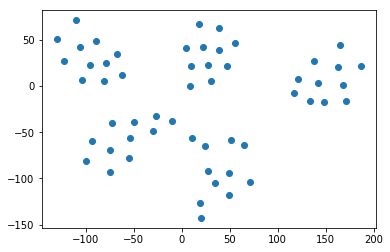

In [320]:
plt.scatter(embed_tsne[:,0],embed_tsne[:,1], label='True Position')  

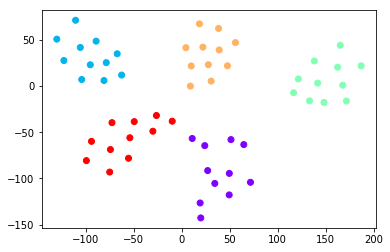

In [322]:
plt.scatter(embed_tsne[:,0],embed_tsne[:,1], c=clids, cmap='rainbow' )  

## Cluster com KMeans nas palavras mais comuns

In [11]:
arquivoEntrada = os.path.join('..','_corpus', "Petrobras-BoletinsTecnicos-Final.txt")
with open(arquivoEntrada, 'r', encoding="UTF-8") as f:
    texto = f.read()

In [17]:
from collections import Counter
word_counts = Counter(texto.split())

most_commom = word_counts.most_common(3000) # lista das palavras mais comuns do vocabulario

### Obtendo os vetores para as paalvras mais comuns
#2- Iterar enter as 1000 palavras mais comuns e pegar o vetor de cada uma usando: model.wv['computer']  # numpy vector of a word
# ou testar: say_vector = model['say']  # get vector for word
#3- empilhar os vetores apenas das palavras mais comuns do vocabulário, e rodar o TSNE

vocabulario = list()
vetores = list()


for word in most_commom:
    palavra = word[0]
    #print(palavra)
    vocabulario.append(palavra)
    vetores.append(word2vec.wv.word_vec(palavra));
matrix = np.vstack(vetores)    
    
print(matrix.shape)
tsne = TSNE(n_components=2, random_state=0, perplexity=5,early_exaggeration=10 )
embed_tsne = tsne.fit_transform(vetores)

(3000, 100)


In [18]:
#clusterizando com KMeans

from sklearn.cluster import KMeans  
import sklearn.cluster
kmeans  = KMeans(n_clusters=50, random_state=10)
clids = kmeans.fit_predict(embed_tsne)
#print(clids)

In [19]:
from bokeh.palettes import Viridis256
print(Viridis256)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Projeção tSNE para modelo Word2vec e clusterização KMeans para termos mais comuns",
           plot_width=800, 
           plot_height=600)

# Associando cada indice de cluster a uma cor, para exibicao no grafico
colors = [Viridis256[x*5] for x in clids]
#print(colors)

source = ColumnDataSource(data=dict(x1=embed_tsne[:,0],
                                    x2=embed_tsne[:,1],
                                    names=vocabulario,
                                    fill_color = colors))

p.scatter(x=embed_tsne[:,0], y=embed_tsne[:,1], size=8, fill_alpha=0.4, color = colors)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

['#440154', '#440255', '#440357', '#450558', '#45065A', '#45085B', '#46095C', '#460B5E', '#460C5F', '#460E61', '#470F62', '#471163', '#471265', '#471466', '#471567', '#471669', '#47186A', '#48196B', '#481A6C', '#481C6E', '#481D6F', '#481E70', '#482071', '#482172', '#482273', '#482374', '#472575', '#472676', '#472777', '#472878', '#472A79', '#472B7A', '#472C7B', '#462D7C', '#462F7C', '#46307D', '#46317E', '#45327F', '#45347F', '#453580', '#453681', '#443781', '#443982', '#433A83', '#433B83', '#433C84', '#423D84', '#423E85', '#424085', '#414186', '#414286', '#404387', '#404487', '#3F4587', '#3F4788', '#3E4888', '#3E4989', '#3D4A89', '#3D4B89', '#3D4C89', '#3C4D8A', '#3C4E8A', '#3B508A', '#3B518A', '#3A528B', '#3A538B', '#39548B', '#39558B', '#38568B', '#38578C', '#37588C', '#37598C', '#365A8C', '#365B8C', '#355C8C', '#355D8C', '#345E8D', '#345F8D', '#33608D', '#33618D', '#32628D', '#32638D', '#31648D', '#31658D', '#31668D', '#30678D', '#30688D', '#2F698D', '#2F6A8D', '#2E6B8E', '#2E6C8E'